In [1]:
from heapy.util.data import msg_format
from heapy.data.reduction import gbmTTE
from heapy.data.retrieve import gbmRetrieve
from heapy.data.response import gbmResponse
from heapy.util.time import fermi_utc_to_met

In [2]:
utc = '2024-02-19T06:21:42'
fermi_met = fermi_utc_to_met(utc)

In [3]:
gbm_rtv = gbmRetrieve.from_utc(utc=utc, t1=-400, t2=400)


+------------------------------------------------+
 extract light curve for n9
+------------------------------------------------+


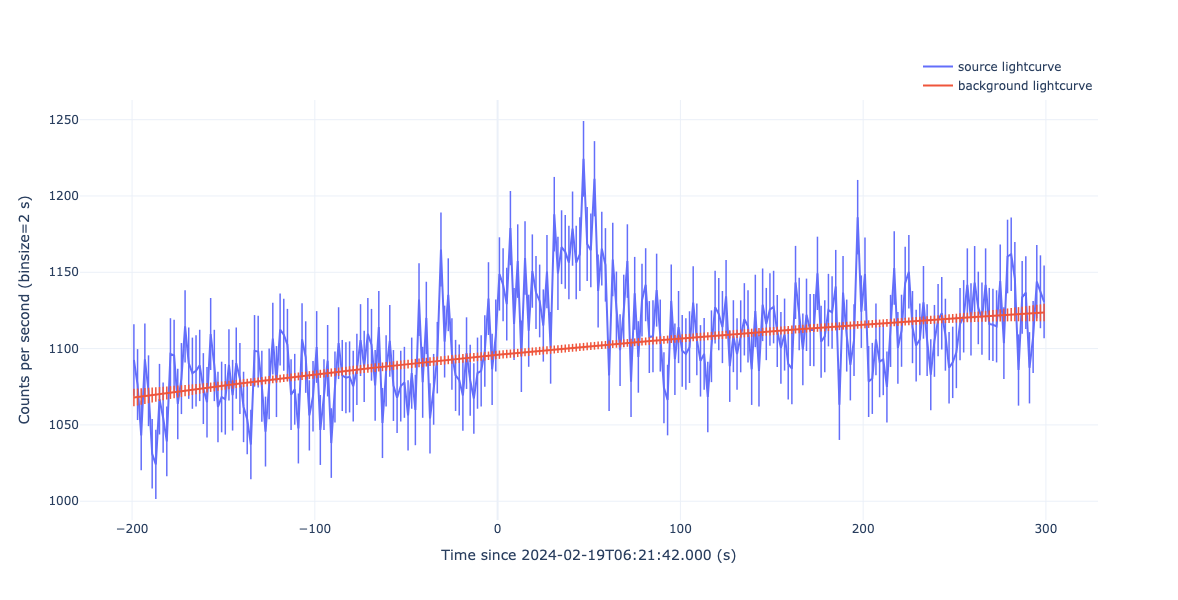


+------------------------------------------------+
 extract light curve for na
+------------------------------------------------+


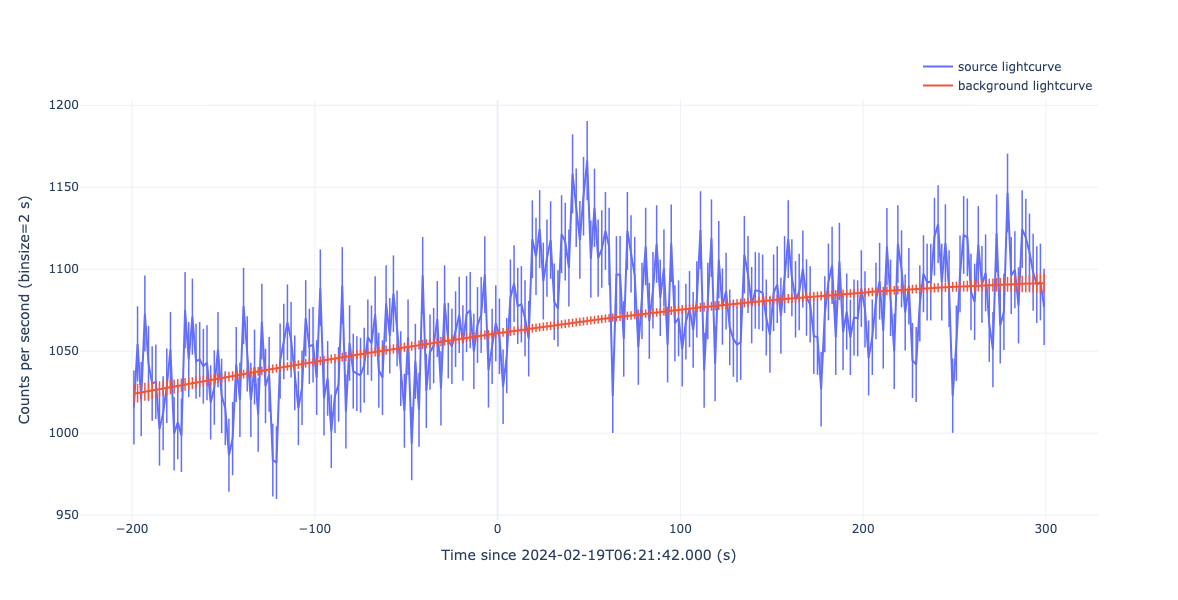

In [4]:
for det in ['n9', 'na']:
    gbm_tte = gbmTTE(gbm_rtv.rtv_res['tte'][det])
    gbm_tte.timezero = fermi_met
    gbm_tte.time_slice(-200, 300)
    gbm_tte.energy_filter(10, 1000)
    
    gbm_event = gbm_tte.to_event
    gbm_event.lc_t1t2 = [-200, 300]
    gbm_event.lc_binsize = 2

    print(msg_format(f'extract light curve for {det}'))
    gbm_event.extract_curve(savepath=f'./{det}/curve', show=True)

In [5]:
for det in ['n9', 'na']:
    gbm_tte = gbmTTE(gbm_rtv.rtv_res['tte'][det])
    gbm_tte.timezero = fermi_met
    gbm_tte.time_slice(-200, 300)
    gbm_tte.energy_filter(10, 1000)
    
    gbm_event = gbm_tte.to_event
    gbm_event.lc_t1t2 = [-200, 300]
    gbm_event.lc_binsize = 2

    print(msg_format(f'calculate txx for {det}'))
    gbm_event.calculate_txx(xx=0.9, savepath=f'./{det}/curve/t90')
    gbm_event.calculate_txx(xx=1.0, savepath=f'./{det}/curve/t100')


+------------------------------------------------+
 calculate txx for n9
+------------------------------------------------+

+-----------------------------------------------+
 ith pulse   Txx (s)     Txx- (s)    Txx+ (s)    
+-----------------------------------------------+
 1           57.810      4.860       7.159       
+-----------------------------------------------+

+-----------------------------------------------+
 ith pulse   Txx (s)     Txx- (s)    Txx+ (s)    
+-----------------------------------------------+
 1           68.773      6.422       11.877      
+-----------------------------------------------+

+------------------------------------------------+
 calculate txx for na
+------------------------------------------------+

+-----------------------------------------------+
 ith pulse   Txx (s)     Txx- (s)    Txx+ (s)    
+-----------------------------------------------+
 1           49.843      13.548      14.318      
+----------------------------------------------


+------------------------------------------------+
 extract spectrum for n9
+------------------------------------------------+


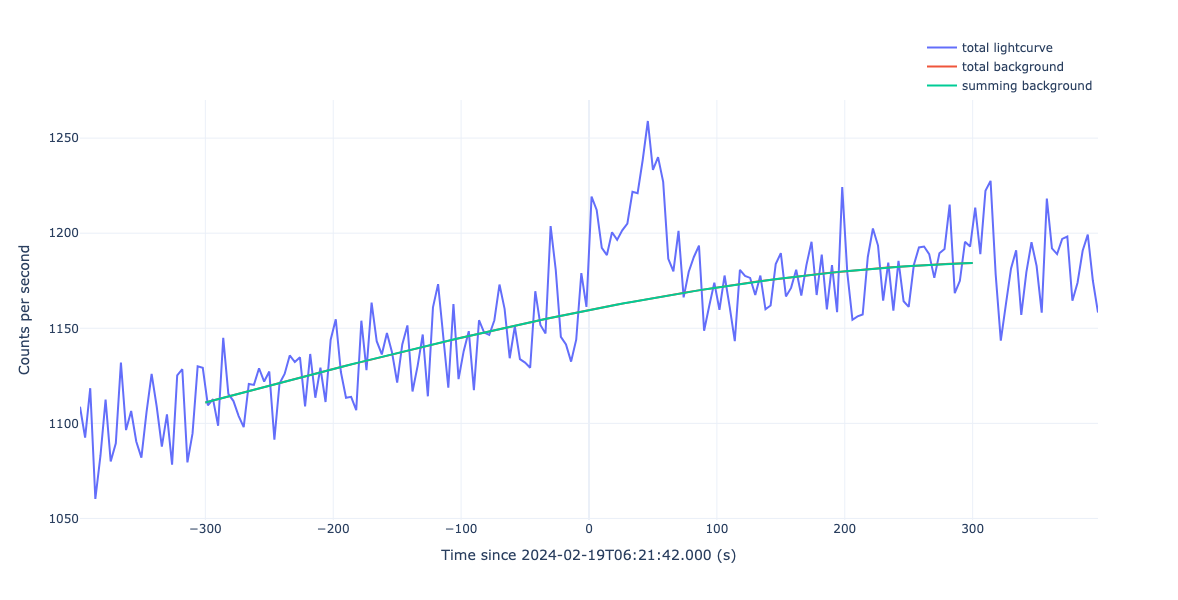


+------------------------------------------------+
 extract spectrum for na
+------------------------------------------------+


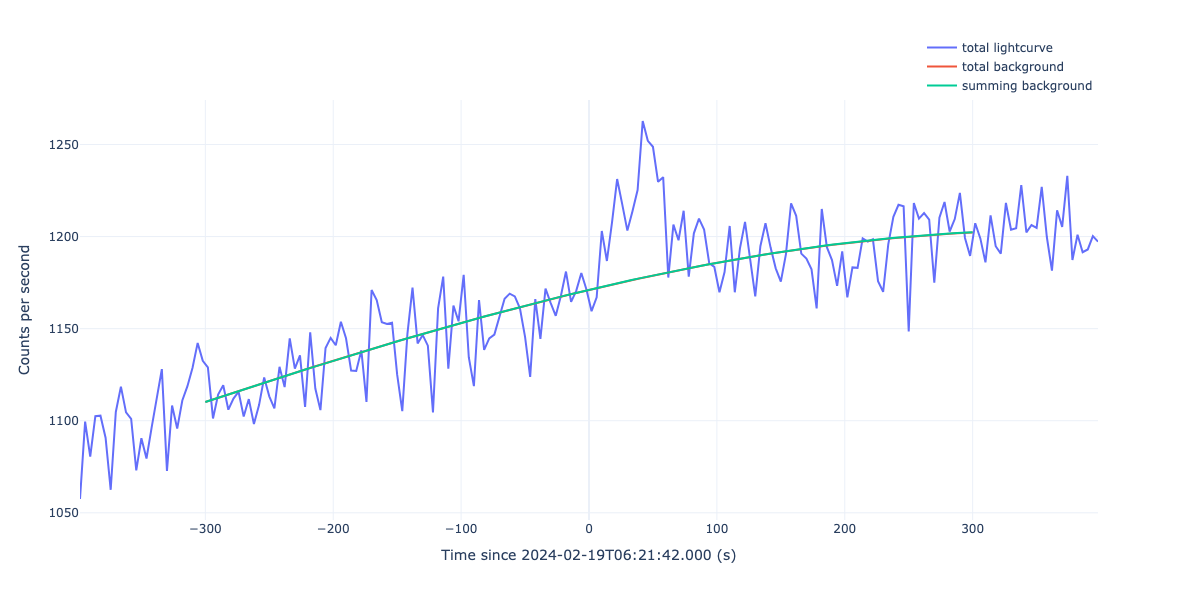


+------------------------------------------------+
 extract spectrum for b1
+------------------------------------------------+


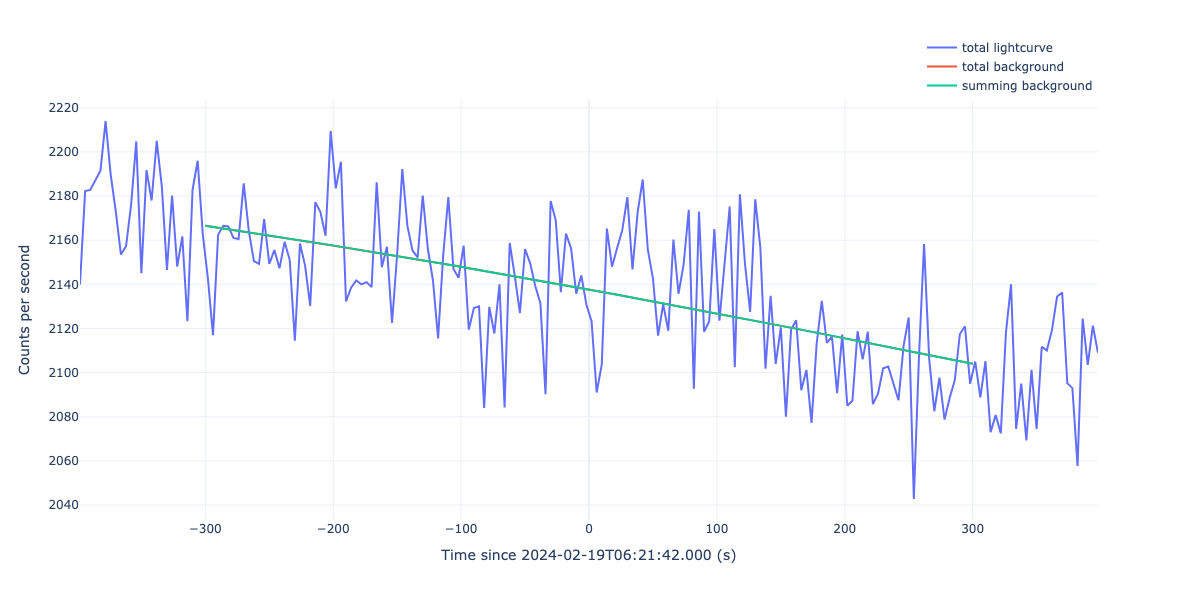

In [6]:
for det in ['n9', 'na', 'b1']:
    gbm_tte = gbmTTE(gbm_rtv.rtv_res['tte'][det])
    gbm_tte.timezero = fermi_met
    gbm_tte.time_slice(-400, 400)
    
    gbm_event = gbm_tte.to_event
    gbm_event.spec_t1t2 = [-400, 400]
    
    print(msg_format(f'extract spectrum for {det}'))
    gbm_event.extract_spectrum(spec_slices=[[0, 70]], savepath=f'./{det}/spectrum', show=True)

In [7]:
for det in ['n9', 'na', 'b1']:
    gbm_resp = gbmResponse(utc, 
                           det, 
                           gbm_rtv.rtv_res['cspec_pha'][det][0], 
                           gbm_rtv.rtv_res['poshist'][0])
    gbm_resp.extract_response(ra=80.016, 
                              dec=25.541, 
                              spec_slices=[[0, 70]], 
                              savepath=f'./{det}/spectrum')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/jyang/mambaforge/lib/python3.10/site-packages/responsum/response.py:108: RuntimeWarning:

Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.380217552185059)

/Users/jyang/mambaforge/lib/python3.10/site-packages/responsum/response.py:108: RuntimeWarning:

Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (3.668320417404175)

